# OMSCS CS7641
# Machine Learning
# Allan Hammer
# Project 3

### Why?
Now it's time to explore unsupervised learning algorithms. This part of the assignment asks you to use some of the clustering and dimensionality reduction algorithms we've looked at in class and to revisit earlier assignments. The goal is for you to think about how these algorithms are the same as, different from, and interact with your earlier work.

The same ground rules apply for programming languages and libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from math import sqrt
from scipy.spatial.distance import cdist
from scipy.stats import kurtosis
from factor_analyzer import FactorAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import FactorAnalysis
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings("ignore")

## Dataset 2: Diabetes

In [2]:
# dataset 2
# https://www.kaggle.com/vikasukani/diabetes-data-set
dat = pd.read_csv("diabetes-dataset.csv")
print("Blind guessing should get you a minimum of: ", (1316/(684+1316))*100, "% accuracy.")
data = pd.get_dummies(dat)
y = data['Outcome']
X = data.drop(['Outcome'], axis=1)

Blind guessing should get you a minimum of:  65.8 % accuracy.


In [3]:
# things to note:
# 1) this dataset has ZERO categorical variables - nothing like the other dataset - how will this affect weighting without normalization just like the other?
# 2) dimensionality is no longer a problem like dataset 1 - will this show in the results?
# 3) This time the problem is sample size - we only have 2000 records to work with - will this be a problem?
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


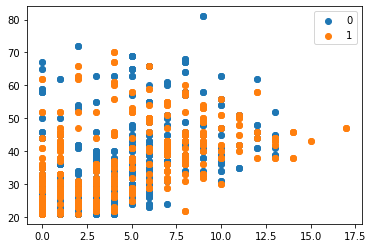

In [4]:
# true results for Pregnancies and Age
u_labels = np.unique(y)

for u in u_labels:
    plt.scatter(X.iloc[y.to_list() == u , 0] , X.iloc[y.to_list() == u , 7] , label = u)
plt.legend()
plt.show()

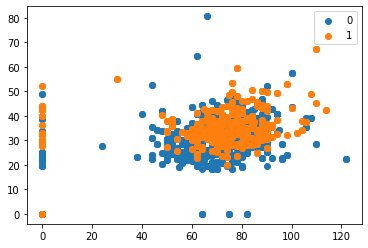

In [5]:
# true results for BP and BMI
u_labels = np.unique(y)

for u in u_labels:
    plt.scatter(X.iloc[y.to_list() == u , 2] , X.iloc[y.to_list() == u , 5] , label = u)
plt.legend()
plt.show()

### KMeans - Finding K and Algorithm

Average time to run: 0.08198306560516358 seconds.


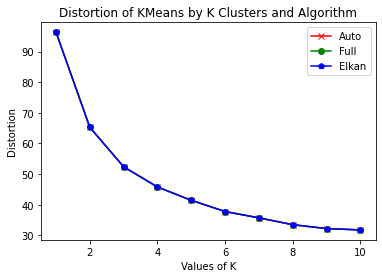

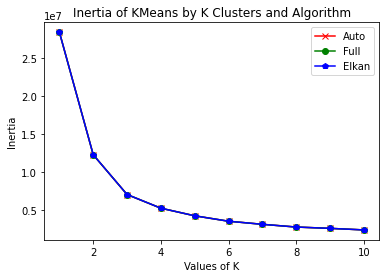

In [6]:
distortions = []
inertias = []
# mapping1 = {}
# mapping2 = {}
K = range(1, 11)
algorithm = ["auto", "full", "elkan"]
 
start = time.time()

for algo in algorithm:
    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k, algorithm=algo, random_state=20170826).fit(X)

        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / X.shape[0])
        inertias.append(kmeanModel.inertia_)

#         mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
#                                        'euclidean'), axis=1)) / X.shape[0]
#         mapping2[k] = kmeanModel.inertia_

end = time.time()
print("Average time to run:", (end-start)/30, "seconds.")

distortions1 = distortions[:10]
distortions2 = distortions[10:20]
distortions3 = distortions[20:]

inertias1 = inertias[:10]
inertias2 = inertias[10:20]
inertias3 = inertias[20:]
    
# for key, val in mapping1.items():
#     print(f'{key} : {val}')
    
plt.plot(K, distortions1, 'rx-')
plt.plot(K, distortions2, 'go-')
plt.plot(K, distortions3, 'bp-')
plt.legend(["Auto","Full","Elkan"])
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Distortion of KMeans by K Clusters and Algorithm')
plt.show()

# for key, val in mapping2.items():
#     print(f'{key} : {val}')

plt.plot(K, inertias1, 'rx-')
plt.plot(K, inertias2, 'go-')
plt.plot(K, inertias3, 'bp-')
plt.legend(["Auto","Full","Elkan"])
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Inertia of KMeans by K Clusters and Algorithm')
plt.show()

***Best K to use: 4.***

***Best algorithm to use: any?***

### Expectation Maximization (GMM) - Finding n_components and covariance_type

Average time to run: 0.03468159834543864 seconds.


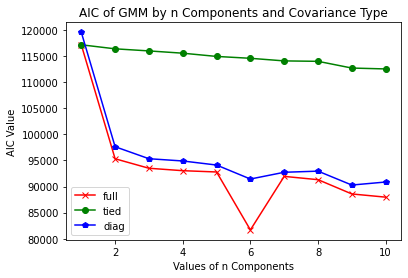

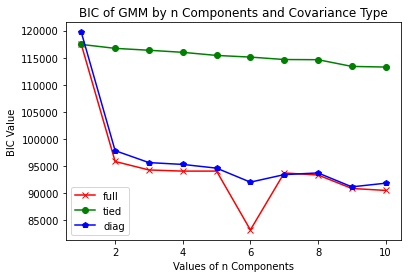

In [7]:
AICs = []
BICs = []
K = range(1, 11)
covariance_type = ["full", "tied", "diag"]
 
start = time.time()

for cov in covariance_type:
    for k in K:
        # Building and fitting the model
        gmm = GaussianMixture(n_components=k, covariance_type=cov, random_state=20170826).fit(X)

        AICs.append(gmm.aic(X))
        BICs.append(gmm.bic(X))

end = time.time()
print("Average time to run:", (end-start)/30, "seconds.")

AICs1 = AICs[:10]
AICs2 = AICs[10:20]
AICs3 = AICs[20:]

BICs1 = BICs[:10]
BICs2 = BICs[10:20]
BICs3 = BICs[20:]
    
plt.plot(K, AICs1, 'rx-')
plt.plot(K, AICs2, 'go-')
plt.plot(K, AICs3, 'bp-')
plt.legend(["full", "tied", "diag"])
plt.xlabel('Values of n Components')
plt.ylabel('AIC Value')
plt.title('AIC of GMM by n Components and Covariance Type')
plt.show()

plt.plot(K, BICs1, 'rx-')
plt.plot(K, BICs2, 'go-')
plt.plot(K, BICs3, 'bp-')
plt.legend(["full", "tied", "diag"])
plt.xlabel('Values of n Components')
plt.ylabel('BIC Value')
plt.title('BIC of GMM by n Components and Covariance Type')
plt.show()

***Best n component to use: 6.***

***Best covariance type to use: Full.***

### PCA - Finding n_components and svd_solver

[8.80697524e-01 6.62568810e-02 2.71549268e-02 1.39571548e-02
 7.97325646e-03 3.42284388e-03 5.30480763e-04]
[8.80697524e-01 6.62568810e-02 2.71549268e-02 1.39571548e-02
 7.97325646e-03 3.42284388e-03 5.30480763e-04]
[8.80697524e-01 6.62568810e-02 2.71549268e-02 1.39571548e-02
 7.97325646e-03 3.42284388e-03 5.30480763e-04]


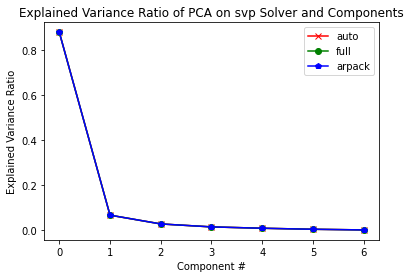

Average time to run: 0.030149300893147785 seconds.


In [8]:
svd_solver = ["auto", "full", "arpack"]

fits = []

start = time.time()

for svd in svd_solver:
    pca = PCA(n_components=X.shape[1]-1, random_state=20170826, svd_solver=svd)
    pca.fit(X)
    
    fits.append(pca.explained_variance_ratio_)

    print(pca.explained_variance_ratio_[:10])

plt.plot(fits[0], 'rx-')
plt.plot(fits[1], 'go-')
plt.plot(fits[2], 'bp-')
plt.legend(["auto", "full", "arpack"])
plt.xlabel('Component #')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of PCA on svp Solver and Components')
plt.show()

end = time.time()
print("Average time to run:", (end-start)/3, "seconds.")

***Best # of components to use: 1.***

***Best svd solver to use: any.***

[0.88069752 0.06625688]
Average time to run: 0.015013694763183594 seconds.


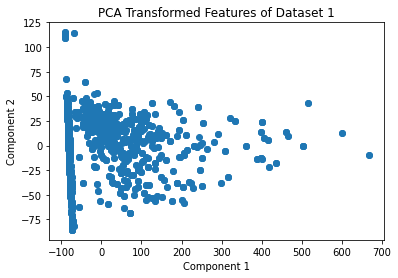

In [9]:
start = time.time()

pca = PCA(n_components=2, random_state=20170826, svd_solver="auto")

components = pca.fit_transform(X)

print(pca.explained_variance_ratio_)

plt.scatter(components[:,0], components[:,1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Transformed Features of Dataset 1')

end = time.time()
print("Average time to run:", (end-start), "seconds.")

In [10]:
pca_X = pd.DataFrame(components)
pca_X.head()

,0,1
0,-77.284731,-24.334762
1,41.800926,40.660552
2,-79.573567,-23.598817
3,171.475001,4.848982
4,400.009652,23.977559


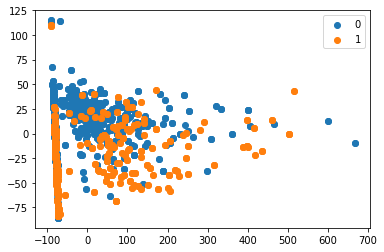

In [11]:
# true results for new data
u_labels = np.unique(y)

for u in u_labels:
    plt.scatter(pca_X.iloc[y.to_list() == u , 0] , pca_X.iloc[y.to_list() == u , 1] , label = u)
plt.legend()
plt.show()

### ICA - Finding n_components and function

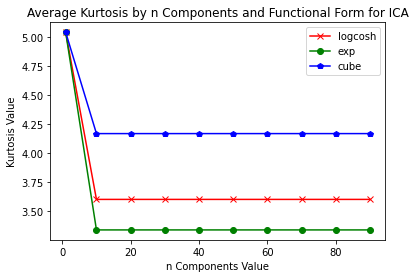

Average time to run: 0.008638914426167805 seconds.


In [12]:
fun = ["logcosh", "exp", "cube"]
n_components = [1,10,20,30,40,50,60,70,80,90]

fits = []

start = time.time()

for f in fun:
    for n in n_components:
        ica = FastICA(n_components=n, random_state=20170826, fun=f)
        c = ica.fit_transform(X)

        fits.append(kurtosis(c).mean())

fits1 = fits[:10]
fits2 = fits[10:20]
fits3 = fits[20:]
        

plt.plot(n_components, fits1, 'rx-')
plt.plot(n_components, fits2, 'go-')
plt.plot(n_components, fits3, 'bp-')
plt.legend(["logcosh", "exp", "cube"])
plt.xlabel('n Components Value')
plt.ylabel('Kurtosis Value')
plt.title('Average Kurtosis by n Components and Functional Form for ICA')
plt.show()

end = time.time()
print("Average time to run:", (end-start)/30, "seconds.")

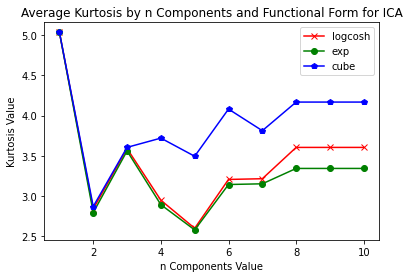

Average time to run: 0.0067401250203450525 seconds.


In [13]:
fun = ["logcosh", "exp", "cube"]
n_components = [1,2,3,4,5,6,7,8,9,10]

fits = []

start = time.time()

for f in fun:
    for n in n_components:
        ica = FastICA(n_components=n, random_state=20170826, fun=f)
        c = ica.fit_transform(X)

        fits.append(kurtosis(c).mean())

fits1 = fits[:10]
fits2 = fits[10:20]
fits3 = fits[20:]
        

plt.plot(n_components, fits1, 'rx-')
plt.plot(n_components, fits2, 'go-')
plt.plot(n_components, fits3, 'bp-')
plt.legend(["logcosh", "exp", "cube"])
plt.xlabel('n Components Value')
plt.ylabel('Kurtosis Value')
plt.title('Average Kurtosis by n Components and Functional Form for ICA')
plt.show()

end = time.time()
print("Average time to run:", (end-start)/30, "seconds.")

***Best # of components to use: 1-10 range.***

***Best fun to use: exp.***

Average Kurtosis: 2.837165127875654
Average time to run: 0.013012409210205078 seconds.


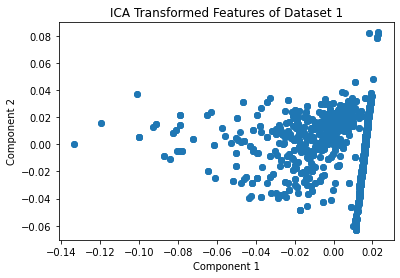

In [14]:
# plotting 2 dimensions
start = time.time()

ica = FastICA(n_components=2, random_state=20170826, fun="logcosh")

c = ica.fit_transform(X)

print("Average Kurtosis:", kurtosis(c).mean())

plt.scatter(c[:,0], c[:,1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('ICA Transformed Features of Dataset 1')

end = time.time()
print("Average time to run:", (end-start), "seconds.")

In [15]:
ica_X = pd.DataFrame(c)
ica_X.head()

,0,1
0,0.014436,-0.018550
1,-0.006701,0.030030
2,0.014922,-0.018040
3,-0.034008,0.005419
4,-0.078822,0.021852


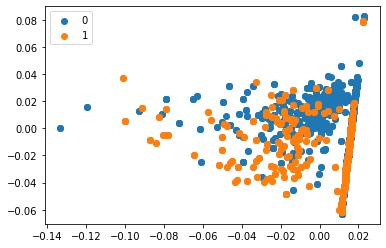

In [16]:
# true results for new data
u_labels = np.unique(y)

for u in u_labels:
    plt.scatter(ica_X.iloc[y.to_list() == u , 0] , ica_X.iloc[y.to_list() == u , 1] , label = u)
plt.legend()
plt.show()

### Random Projections - Finding n_components

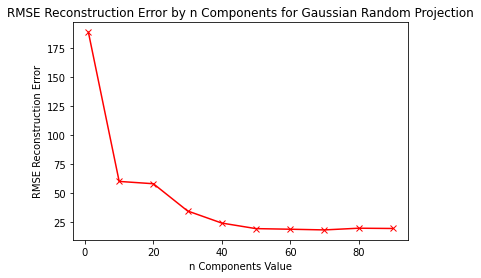

Average time to run: 0.012811875343322754 seconds.


In [17]:
n_components = [1,10,20,30,40,50,60,70,80,90]

fits = []

start = time.time()

for n in n_components:
    rp = GaussianRandomProjection(n_components=n, random_state=20170826)
    c = rp.fit_transform(X)
    
    d = rp.components_
    
    new_x = np.matmul(c, d)
    rmse = sqrt(mean_squared_error(X, new_x))

    fits.append(rmse)
        
plt.plot(n_components, fits, 'rx-')
plt.xlabel('n Components Value')
plt.ylabel('RMSE Reconstruction Error')
plt.title('RMSE Reconstruction Error by n Components for Gaussian Random Projection')
plt.show()

end = time.time()
print("Average time to run:", (end-start)/10, "seconds.")

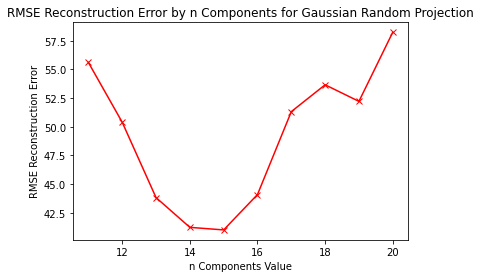

Average time to run: 0.008107352256774902 seconds.


In [18]:
n_components = [11,12,13,14,15,16,17,18,19,20]

fits = []

start = time.time()

for n in n_components:
    rp = GaussianRandomProjection(n_components=n, random_state=20170826)
    c = rp.fit_transform(X)
    
    d = rp.components_
    
    new_x = np.matmul(c, d)
    rmse = sqrt(mean_squared_error(X, new_x))

    fits.append(rmse)
        
plt.plot(n_components, fits, 'rx-')
plt.xlabel('n Components Value')
plt.ylabel('RMSE Reconstruction Error')
plt.title('RMSE Reconstruction Error by n Components for Gaussian Random Projection')
plt.show()

end = time.time()
print("Average time to run:", (end-start)/10, "seconds.")

***Best # of components to use: 14-16 range.***

RMSE: 133.7825365351923
Average time to run: 0.013011455535888672 seconds.


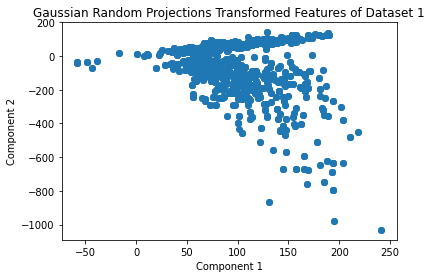

In [19]:
# plotting 2 dimensions (not ideal number)
start = time.time()

rp = GaussianRandomProjection(n_components=2, random_state=20170826)
c = rp.fit_transform(X)

d = rp.components_

new_x = np.matmul(c, d)
rmse = sqrt(mean_squared_error(X, new_x))

print("RMSE:", rmse)

plt.scatter(c[:,0], c[:,1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Gaussian Random Projections Transformed Features of Dataset 1')

end = time.time()

print("Average time to run:", (end-start), "seconds.")

In [20]:
rp_X = pd.DataFrame(c)
rp_X.head()

,0,1
0,93.200273,83.531343
1,55.173099,-169.797971
2,143.213220,96.848103
3,126.597595,-317.418292
4,157.324677,-669.348176


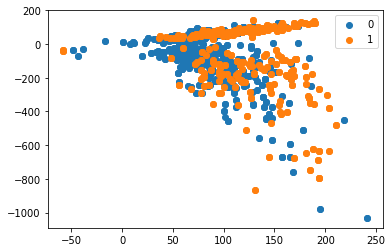

In [21]:
# true results for new data
u_labels = np.unique(y)

for u in u_labels:
    plt.scatter(rp_X.iloc[y.to_list() == u , 0] , rp_X.iloc[y.to_list() == u , 1] , label = u)
plt.legend()
plt.show()

In [22]:
start = time.time()

rp = GaussianRandomProjection(n_components=15, random_state=20170826)
c = rp.fit_transform(X)

d = rp.components_

new_x = np.matmul(c, d)
rmse = sqrt(mean_squared_error(X, new_x))

print("RMSE:", rmse)

end = time.time()
print("Average time to run:", (end-start), "seconds.")

RMSE: 41.004115534189985
Average time to run: 0.002001523971557617 seconds.


In [23]:
rp_X = pd.DataFrame(c)
rp_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,34.031928,30.501334,-15.938703,-13.318459,-22.627830,19.690927,-13.480605,-19.747663,-83.384587,7.455117,10.536979,15.866468,-35.151608,37.319164,-30.000478
1,20.146367,-62.001453,-31.106220,-53.494204,-26.814730,-18.556342,56.049456,-51.136868,-79.789942,-39.035831,-1.188930,16.094800,-28.311272,2.081439,-8.778244
2,52.294074,35.363927,-10.369397,-28.813844,-29.890493,36.813566,-21.066629,-5.730230,-39.392936,4.272305,-23.929399,32.555615,-50.331531,33.888085,-36.616236
3,46.226906,-115.904772,-77.990595,-137.257140,-59.808890,-27.051918,115.462816,-74.398894,-75.906540,-89.854467,-39.974278,9.112544,-33.770182,-7.042635,-30.864949
4,57.446850,-244.411397,-146.995140,-254.184254,-94.650818,-66.043745,233.871340,-124.251856,-60.455043,-168.663572,-93.088344,-2.210631,-37.881006,-49.629739,-33.044349


### Factor Analysis - Finding n_components and svd_method

In [24]:
fa = FactorAnalyzer()
fa.fit(X)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([2.09229825, 1.73529484, 1.015294  , 0.88388697, 0.76592616,
       0.67321664, 0.43324282, 0.40084032])

This shows 3 possible features to work with.

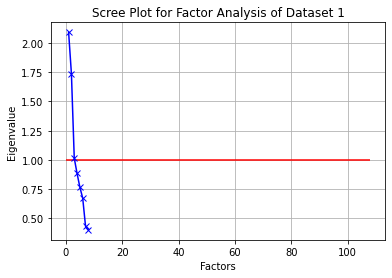

In [25]:
plt.plot(range(1,X.shape[1]+1),eigen_values, 'bx-')
plt.title('Scree Plot for Factor Analysis of Dataset 1')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.hlines(1, 0, 108, colors='red')
plt.grid()
plt.show()

Score: -29.585440110005596
Average time to run: 0.01501321792602539 seconds.


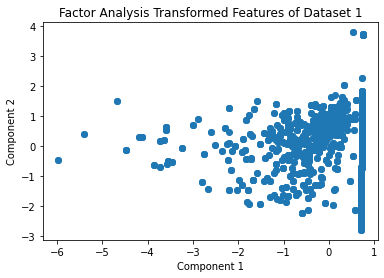

In [26]:
# plotting 2 dimensions (not ideal number)
start = time.time()

fa = FactorAnalysis(n_components=2, random_state=20170826, svd_method='lapack')
c = fa.fit_transform(X)

plt.scatter(c[:,0], c[:,1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Factor Analysis Transformed Features of Dataset 1')
        
print("Score:", fa.score(X))

end = time.time()
print("Average time to run:", (end-start), "seconds.")

In [27]:
fa_X = pd.DataFrame(c)
fa_X.head()

,0,1
0,0.717758,-0.796378
1,-0.395620,1.355702
2,0.716703,-1.020658
3,-1.526771,0.072972
4,-3.592730,0.647088


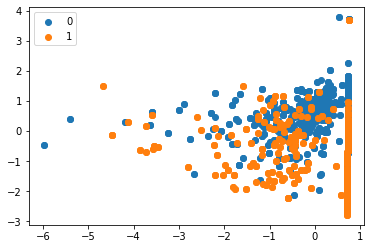

In [28]:
# true results for new data
u_labels = np.unique(y)

for u in u_labels:
    plt.scatter(fa_X.iloc[y.to_list() == u , 0] , fa_X.iloc[y.to_list() == u , 1] , label = u)
plt.legend()
plt.show()

In [29]:
start = time.time()

fa = FactorAnalysis(n_components=3, random_state=20170826, svd_method='lapack')
c = fa.fit_transform(X)
        
print("Score:", fa.score(X))

end = time.time()
print("Average time to run:", (end-start), "seconds.")

Score: -29.400738466247333
Average time to run: 0.0898597240447998 seconds.


In [30]:
fa_X = pd.DataFrame(c)
fa_X.head()

,0,1,2
0,0.712674,-0.807900,-0.495518
1,-0.386938,1.364549,0.454038
2,0.710075,-1.028481,0.914861
3,-1.526334,0.084069,0.707294
4,-3.588578,0.673296,0.535257


## Revisiting Clustering (Using newly transformed datasets):

Let's take a look at clustering again, AFTER we have ran any dimensionality reduction algorithm on our dataset (let's say PCA).

In [31]:
# new datasets
print(pca_X.head(1))
print(ica_X.head(1))
print(rp_X.head(1))
print(fa_X.head(1))

           0          1
0 -77.284731 -24.334762
          0        1
0  0.014436 -0.01855
          0          1          2          3         4          5          6   \
0  34.031928  30.501334 -15.938703 -13.318459 -22.62783  19.690927 -13.480605   

          7          8         9          10         11         12         13  \
0 -19.747663 -83.384587  7.455117  10.536979  15.866468 -35.151608  37.319164   

          14  
0 -30.000478  
          0       1         2
0  0.712674 -0.8079 -0.495518


### KMeans - Finding K and Algorithm

Average time to run: 0.07385307947794596 seconds.


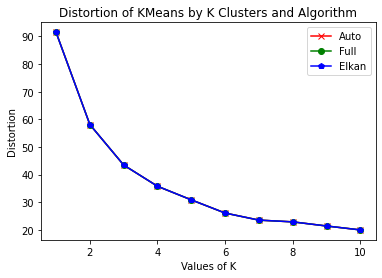

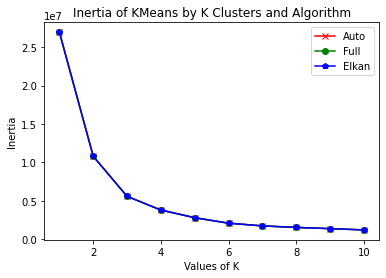

In [32]:
# PCA

distortions = []
inertias = []
K = range(1, 11)
algorithm = ["auto", "full", "elkan"]
 
start = time.time()

for algo in algorithm:
    for k in K:
        kmeanModel = KMeans(n_clusters=k, algorithm=algo, random_state=20170826).fit(pca_X)

        distortions.append(sum(np.min(cdist(pca_X, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / pca_X.shape[0])
        inertias.append(kmeanModel.inertia_)

end = time.time()
print("Average time to run:", (end-start)/30, "seconds.")

distortions1 = distortions[:10]
distortions2 = distortions[10:20]
distortions3 = distortions[20:]

inertias1 = inertias[:10]
inertias2 = inertias[10:20]
inertias3 = inertias[20:]
    
plt.plot(K, distortions1, 'rx-')
plt.plot(K, distortions2, 'go-')
plt.plot(K, distortions3, 'bp-')
plt.legend(["Auto","Full","Elkan"])
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Distortion of KMeans by K Clusters and Algorithm')
plt.show()

plt.plot(K, inertias1, 'rx-')
plt.plot(K, inertias2, 'go-')
plt.plot(K, inertias3, 'bp-')
plt.legend(["Auto","Full","Elkan"])
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Inertia of KMeans by K Clusters and Algorithm')
plt.show()

***Best K to use: 4.***

***Best algorithm to use: any?***

Average time to run: 0.07644012769063314 seconds.


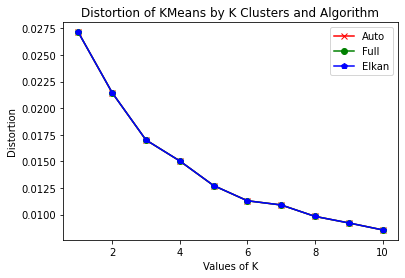

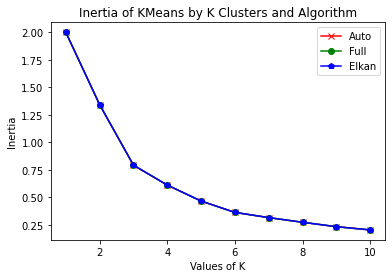

In [33]:
# ICA
distortions = []
inertias = []
K = range(1, 11)
algorithm = ["auto", "full", "elkan"]
 
start = time.time()

for algo in algorithm:
    for k in K:
        kmeanModel = KMeans(n_clusters=k, algorithm=algo, random_state=20170826).fit(ica_X)

        distortions.append(sum(np.min(cdist(ica_X, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / ica_X.shape[0])
        inertias.append(kmeanModel.inertia_)

end = time.time()
print("Average time to run:", (end-start)/30, "seconds.")

distortions1 = distortions[:10]
distortions2 = distortions[10:20]
distortions3 = distortions[20:]

inertias1 = inertias[:10]
inertias2 = inertias[10:20]
inertias3 = inertias[20:]
    
plt.plot(K, distortions1, 'rx-')
plt.plot(K, distortions2, 'go-')
plt.plot(K, distortions3, 'bp-')
plt.legend(["Auto","Full","Elkan"])
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Distortion of KMeans by K Clusters and Algorithm')
plt.show()

plt.plot(K, inertias1, 'rx-')
plt.plot(K, inertias2, 'go-')
plt.plot(K, inertias3, 'bp-')
plt.legend(["Auto","Full","Elkan"])
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Inertia of KMeans by K Clusters and Algorithm')
plt.show()

***Best K to use: 4?***

***Best algorithm to use: any?***

Average time to run: 0.08602416515350342 seconds.


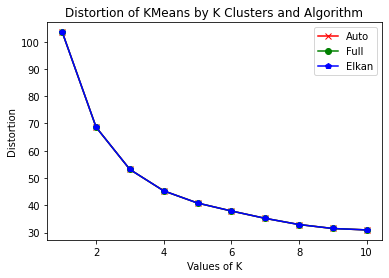

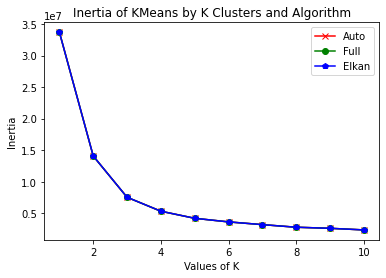

In [34]:
# RP

distortions = []
inertias = []
K = range(1, 11)
algorithm = ["auto", "full", "elkan"]
 
start = time.time()

for algo in algorithm:
    for k in K:
        kmeanModel = KMeans(n_clusters=k, algorithm=algo, random_state=20170826).fit(rp_X)

        distortions.append(sum(np.min(cdist(rp_X, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / rp_X.shape[0])
        inertias.append(kmeanModel.inertia_)

end = time.time()
print("Average time to run:", (end-start)/30, "seconds.")

distortions1 = distortions[:10]
distortions2 = distortions[10:20]
distortions3 = distortions[20:]

inertias1 = inertias[:10]
inertias2 = inertias[10:20]
inertias3 = inertias[20:]
    
plt.plot(K, distortions1, 'rx-')
plt.plot(K, distortions2, 'go-')
plt.plot(K, distortions3, 'bp-')
plt.legend(["Auto","Full","Elkan"])
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Distortion of KMeans by K Clusters and Algorithm')
plt.show()

plt.plot(K, inertias1, 'rx-')
plt.plot(K, inertias2, 'go-')
plt.plot(K, inertias3, 'bp-')
plt.legend(["Auto","Full","Elkan"])
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Inertia of KMeans by K Clusters and Algorithm')
plt.show()

***Best K to use: 4.***

***Best algorithm to use: any?***

Average time to run: 0.0825912872950236 seconds.


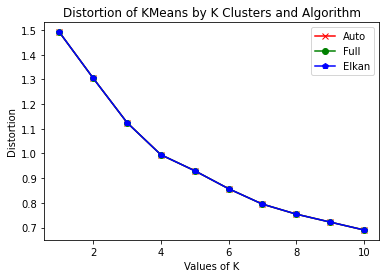

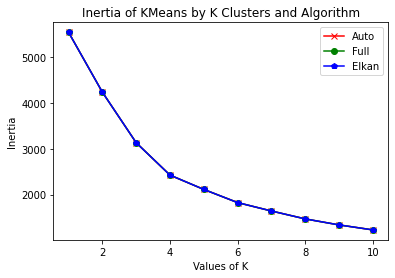

In [35]:
# FA

distortions = []
inertias = []
K = range(1, 11)
algorithm = ["auto", "full", "elkan"]
 
start = time.time()

for algo in algorithm:
    for k in K:
        kmeanModel = KMeans(n_clusters=k, algorithm=algo, random_state=20170826).fit(fa_X)

        distortions.append(sum(np.min(cdist(fa_X, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / fa_X.shape[0])
        inertias.append(kmeanModel.inertia_)

end = time.time()
print("Average time to run:", (end-start)/30, "seconds.")

distortions1 = distortions[:10]
distortions2 = distortions[10:20]
distortions3 = distortions[20:]

inertias1 = inertias[:10]
inertias2 = inertias[10:20]
inertias3 = inertias[20:]
    
plt.plot(K, distortions1, 'rx-')
plt.plot(K, distortions2, 'go-')
plt.plot(K, distortions3, 'bp-')
plt.legend(["Auto","Full","Elkan"])
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Distortion of KMeans by K Clusters and Algorithm')
plt.show()

plt.plot(K, inertias1, 'rx-')
plt.plot(K, inertias2, 'go-')
plt.plot(K, inertias3, 'bp-')
plt.legend(["Auto","Full","Elkan"])
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Inertia of KMeans by K Clusters and Algorithm')
plt.show()

***Best K to use: 4?***

***Best algorithm to use: any?***

### Expectation Maximization (GMM) - Finding n_components and covariance_type

Average time to run: 0.02822870413462321 seconds.


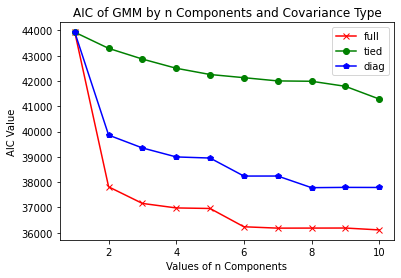

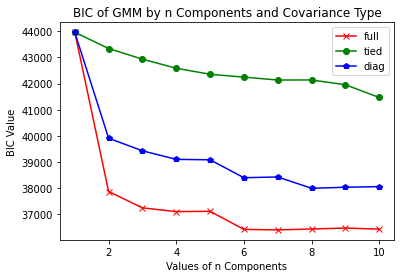

In [36]:
# PCA

AICs = []
BICs = []
K = range(1, 11)
covariance_type = ["full", "tied", "diag"]
 
start = time.time()

for cov in covariance_type:
    for k in K:
        # Building and fitting the model
        gmm = GaussianMixture(n_components=k, covariance_type=cov, random_state=20170826).fit(pca_X)

        AICs.append(gmm.aic(pca_X))
        BICs.append(gmm.bic(pca_X))

end = time.time()
print("Average time to run:", (end-start)/30, "seconds.")

AICs1 = AICs[:10]
AICs2 = AICs[10:20]
AICs3 = AICs[20:]

BICs1 = BICs[:10]
BICs2 = BICs[10:20]
BICs3 = BICs[20:]
    
plt.plot(K, AICs1, 'rx-')
plt.plot(K, AICs2, 'go-')
plt.plot(K, AICs3, 'bp-')
plt.legend(["full", "tied", "diag"])
plt.xlabel('Values of n Components')
plt.ylabel('AIC Value')
plt.title('AIC of GMM by n Components and Covariance Type')
plt.show()

plt.plot(K, BICs1, 'rx-')
plt.plot(K, BICs2, 'go-')
plt.plot(K, BICs3, 'bp-')
plt.legend(["full", "tied", "diag"])
plt.xlabel('Values of n Components')
plt.ylabel('BIC Value')
plt.title('BIC of GMM by n Components and Covariance Type')
plt.show()

***Best n component to use: 10?***

***Best covariance type to use: Full.***

Average time to run: 0.021169336636861165 seconds.


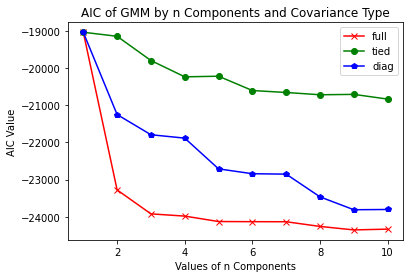

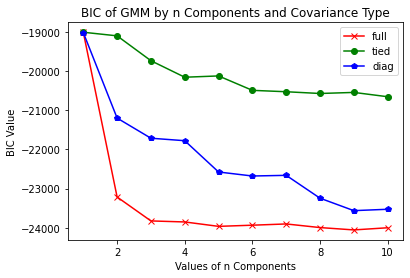

In [37]:
# ICA

AICs = []
BICs = []
K = range(1, 11)
covariance_type = ["full", "tied", "diag"]
 
start = time.time()

for cov in covariance_type:
    for k in K:
        # Building and fitting the model
        gmm = GaussianMixture(n_components=k, covariance_type=cov, random_state=20170826).fit(ica_X)

        AICs.append(gmm.aic(ica_X))
        BICs.append(gmm.bic(ica_X))

end = time.time()
print("Average time to run:", (end-start)/30, "seconds.")

AICs1 = AICs[:10]
AICs2 = AICs[10:20]
AICs3 = AICs[20:]

BICs1 = BICs[:10]
BICs2 = BICs[10:20]
BICs3 = BICs[20:]
    
plt.plot(K, AICs1, 'rx-')
plt.plot(K, AICs2, 'go-')
plt.plot(K, AICs3, 'bp-')
plt.legend(["full", "tied", "diag"])
plt.xlabel('Values of n Components')
plt.ylabel('AIC Value')
plt.title('AIC of GMM by n Components and Covariance Type')
plt.show()

plt.plot(K, BICs1, 'rx-')
plt.plot(K, BICs2, 'go-')
plt.plot(K, BICs3, 'bp-')
plt.legend(["full", "tied", "diag"])
plt.xlabel('Values of n Components')
plt.ylabel('BIC Value')
plt.title('BIC of GMM by n Components and Covariance Type')
plt.show()

***Best n component to use: 10.***

***Best covariance type to use: Full.***

Average time to run: 0.04218398729960124 seconds.


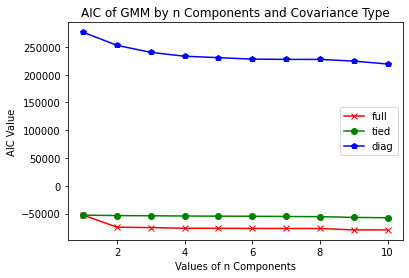

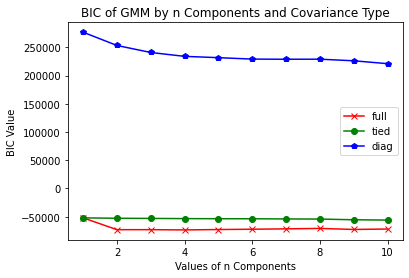

In [38]:
# RP

AICs = []
BICs = []
K = range(1, 11)
covariance_type = ["full", "tied", "diag"]
 
start = time.time()

for cov in covariance_type:
    for k in K:
        # Building and fitting the model
        gmm = GaussianMixture(n_components=k, covariance_type=cov, random_state=20170826).fit(rp_X)

        AICs.append(gmm.aic(rp_X))
        BICs.append(gmm.bic(rp_X))

end = time.time()
print("Average time to run:", (end-start)/30, "seconds.")

AICs1 = AICs[:10]
AICs2 = AICs[10:20]
AICs3 = AICs[20:]

BICs1 = BICs[:10]
BICs2 = BICs[10:20]
BICs3 = BICs[20:]
    
plt.plot(K, AICs1, 'rx-')
plt.plot(K, AICs2, 'go-')
plt.plot(K, AICs3, 'bp-')
plt.legend(["full", "tied", "diag"])
plt.xlabel('Values of n Components')
plt.ylabel('AIC Value')
plt.title('AIC of GMM by n Components and Covariance Type')
plt.show()

plt.plot(K, BICs1, 'rx-')
plt.plot(K, BICs2, 'go-')
plt.plot(K, BICs3, 'bp-')
plt.legend(["full", "tied", "diag"])
plt.xlabel('Values of n Components')
plt.ylabel('BIC Value')
plt.title('BIC of GMM by n Components and Covariance Type')
plt.show()

***Best n component to use: Any.***

***Best covariance type to use: Full.***

Average time to run: 0.033766436576843264 seconds.


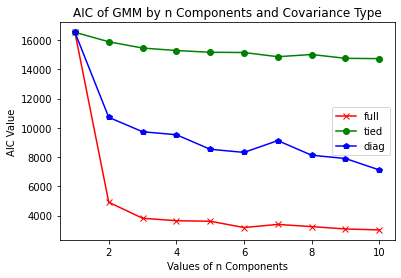

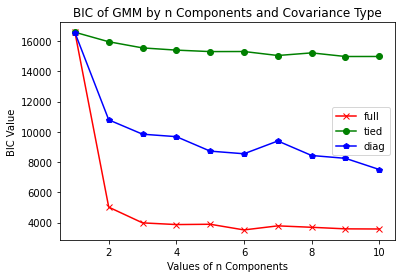

In [39]:
# FA

AICs = []
BICs = []
K = range(1, 11)
covariance_type = ["full", "tied", "diag"]
 
start = time.time()

for cov in covariance_type:
    for k in K:
        # Building and fitting the model
        gmm = GaussianMixture(n_components=k, covariance_type=cov, random_state=20170826).fit(fa_X)

        AICs.append(gmm.aic(fa_X))
        BICs.append(gmm.bic(fa_X))

end = time.time()
print("Average time to run:", (end-start)/30, "seconds.")

AICs1 = AICs[:10]
AICs2 = AICs[10:20]
AICs3 = AICs[20:]

BICs1 = BICs[:10]
BICs2 = BICs[10:20]
BICs3 = BICs[20:]
    
plt.plot(K, AICs1, 'rx-')
plt.plot(K, AICs2, 'go-')
plt.plot(K, AICs3, 'bp-')
plt.legend(["full", "tied", "diag"])
plt.xlabel('Values of n Components')
plt.ylabel('AIC Value')
plt.title('AIC of GMM by n Components and Covariance Type')
plt.show()

plt.plot(K, BICs1, 'rx-')
plt.plot(K, BICs2, 'go-')
plt.plot(K, BICs3, 'bp-')
plt.legend(["full", "tied", "diag"])
plt.xlabel('Values of n Components')
plt.ylabel('BIC Value')
plt.title('BIC of GMM by n Components and Covariance Type')
plt.show()

***Best n component to use: 10.***

***Best covariance type to use: Full.***

## Revisiting Neural Networks (Using newly transformed datasets):

Let's take a look at the MLPs from P1 again (again!), AFTER we have ran any dimensionality reduction algorithm on our dataset (let's say PCA).

In [40]:
# LEARNING CURVES
validation_sizes = [.05, .10, .20, .33, .5]

Completed round 1 of 5
Completed round 2 of 5
Completed round 3 of 5
Completed round 4 of 5
Completed round 5 of 5


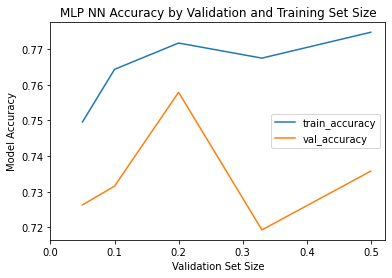

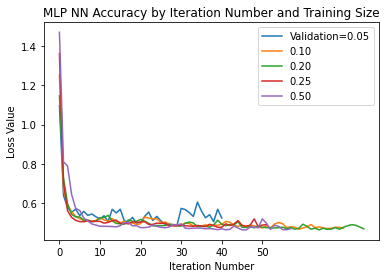

In [41]:
# PCA

# split into train and test (we will use the test for all final testing)
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=.05)

train_accuracy = []
val_accuracy = []

loss = []

for i in range(5):
    X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=validation_sizes[i], random_state=20170826)
    
    mlp = MLPClassifier(hidden_layer_sizes=(100,50,100) ,activation='relu', random_state=20170826)
    
    mlp.fit(X_train_new, y_train_new)
    
    loss.append(mlp.loss_curve_)
    
    predictions_train = mlp.predict(X_train_new)
    predictions_val = mlp.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_train_new, predictions_train))
    val_accuracy.append(accuracy_score(y_val, predictions_val))
    
    print("Completed round", i+1, "of 5")
    
training_df = pd.DataFrame(
    {'train_accuracy': train_accuracy,
     'val_accuracy': val_accuracy,
     'validation_sizes': validation_sizes}
)

plt.plot(training_df["validation_sizes"], training_df[["train_accuracy", "val_accuracy"]])
plt.xlabel('Validation Set Size')
plt.ylabel('Model Accuracy')
plt.title('MLP NN Accuracy by Validation and Training Set Size')
plt.xticks([0,.1,.2,.3,.4,.5])
plt.legend(['train_accuracy', "val_accuracy"])
plt.show()

for l in loss:
    plt.plot(l)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Value')
plt.title('MLP NN Accuracy by Iteration Number and Training Size')
plt.xticks(np.arange(0,51,10))
plt.legend(['Validation=0.05', "0.10", "0.20", "0.25", "0.50"])
plt.show()

***Best validation set size for the hyperparameters: 0.2 - This means a k of 5 for k-fold cross validation.***

Completed Round 1 of 5.
Completed Round 2 of 5.
Completed Round 3 of 5.
Completed Round 4 of 5.
Completed Round 5 of 5.


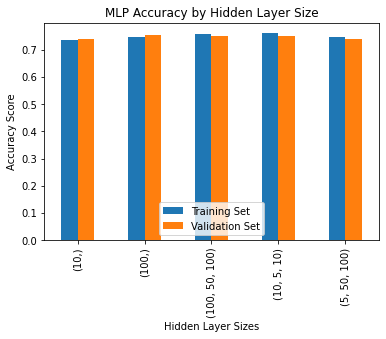

In [42]:
# first we do hidden_layer_sizes
hidden_layer_sizes = [(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]

scores_train = []
scores_val = []

for i in range(5):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())

    print("Completed Round", i+1, "of 5.")
    
hidden_layer_sizes_cats = []
for i in range(5):
    hidden_layer_sizes_cats.append(str(hidden_layer_sizes[i]))
    
hidden_layers_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'hidden_layer_sizes': hidden_layer_sizes_cats}
)
hidden_layers_df['hidden_layer_sizes'] = hidden_layers_df['hidden_layer_sizes'].astype('category')

hidden_layers_df.plot.bar(x="hidden_layer_sizes")
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Hidden Layer Size')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Hidden Layer size for the test set: (100,50,100). All of them performed similarly though.***

Completed Round 1 of 4.
Completed Round 2 of 4.
Completed Round 3 of 4.
Completed Round 4 of 4.


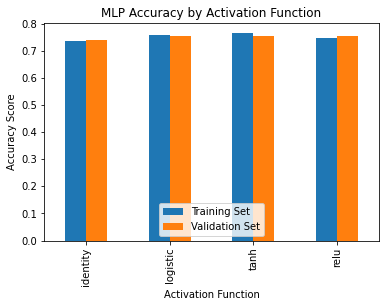

In [43]:
# let's try one more parameter - 
activation = ['identity', 'logistic', 'tanh', 'relu']

scores_train = []
scores_val = []

for i in range(4):
    mlp = MLPClassifier(activation=activation[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())
        
    print("Completed Round", i+1, "of 4.")
    
activation_cats = []
for i in range(4):
    activation_cats.append(str(activation[i]))
    
activations_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'activation': activation_cats}
)
activations_df['activation'] = activations_df['activation'].astype('category')

activations_df.plot.bar(x="activation")
plt.xlabel('Activation Function')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Activation Function')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Activation Function for the test set: tanh.***

In [44]:
# according to this, our best parameters are a hidden layer size of (100,50,100) and an activtion function of tanh, with some variation
start = time.time()

param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes':[(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]}

mlp_final = GridSearchCV(MLPClassifier(random_state=20170826), param_grid=param_grid)
mlp_final.fit(X_train, y_train)
predictions = mlp_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to use Grid Search:", (end-start)/60, "minutes")
print("Final MLP Test Accuracy:", final_score)
print("Best Params from Grid Search:", mlp_final.best_params_)

Time to use Grid Search: 0.8601659695307414 minutes
Final MLP Test Accuracy: 0.72
Best Params from Grid Search: {'activation': 'tanh', 'hidden_layer_sizes': (10, 5, 10)}


In [45]:
print("Final MLP accuracy is performing", ((final_score-0.7607182343065395)/0.7607182343065395)*100, "% better than the baseline of blind guessing.")

Final MLP accuracy is performing -5.352603956398879 % better than the baseline of blind guessing.


Completed round 1 of 5
Completed round 2 of 5
Completed round 3 of 5
Completed round 4 of 5
Completed round 5 of 5


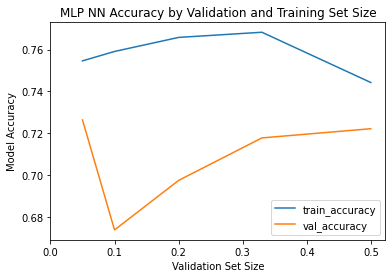

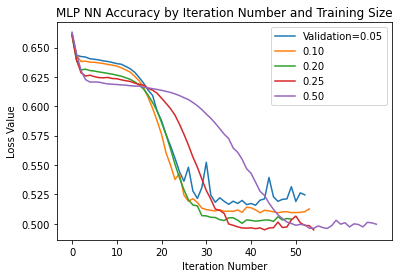

In [46]:
# ICA

# split into train and test (we will use the test for all final testing)
X_train, X_test, y_train, y_test = train_test_split(ica_X, y, test_size=.05)

train_accuracy = []
val_accuracy = []

loss = []

for i in range(5):
    X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=validation_sizes[i], random_state=20170826)
    
    mlp = MLPClassifier(hidden_layer_sizes=(100,50,100) ,activation='relu', random_state=20170826)
    
    mlp.fit(X_train_new, y_train_new)
    
    loss.append(mlp.loss_curve_)
    
    predictions_train = mlp.predict(X_train_new)
    predictions_val = mlp.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_train_new, predictions_train))
    val_accuracy.append(accuracy_score(y_val, predictions_val))
    
    print("Completed round", i+1, "of 5")
    
training_df = pd.DataFrame(
    {'train_accuracy': train_accuracy,
     'val_accuracy': val_accuracy,
     'validation_sizes': validation_sizes}
)

plt.plot(training_df["validation_sizes"], training_df[["train_accuracy", "val_accuracy"]])
plt.xlabel('Validation Set Size')
plt.ylabel('Model Accuracy')
plt.title('MLP NN Accuracy by Validation and Training Set Size')
plt.xticks([0,.1,.2,.3,.4,.5])
plt.legend(['train_accuracy', "val_accuracy"])
plt.show()

for l in loss:
    plt.plot(l)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Value')
plt.title('MLP NN Accuracy by Iteration Number and Training Size')
plt.xticks(np.arange(0,51,10))
plt.legend(['Validation=0.05', "0.10", "0.20", "0.25", "0.50"])
plt.show()

***Best validation set size for the hyperparameters: 0.5 - This means a k of 2 for k-fold cross validation.***

Completed Round 1 of 5.
Completed Round 2 of 5.
Completed Round 3 of 5.
Completed Round 4 of 5.
Completed Round 5 of 5.


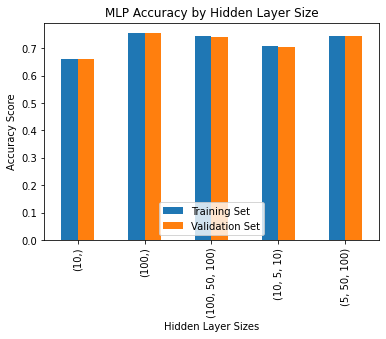

In [47]:
# first we do hidden_layer_sizes
hidden_layer_sizes = [(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]

scores_train = []
scores_val = []

for i in range(5):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())

    print("Completed Round", i+1, "of 5.")
    
hidden_layer_sizes_cats = []
for i in range(5):
    hidden_layer_sizes_cats.append(str(hidden_layer_sizes[i]))
    
hidden_layers_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'hidden_layer_sizes': hidden_layer_sizes_cats}
)
hidden_layers_df['hidden_layer_sizes'] = hidden_layers_df['hidden_layer_sizes'].astype('category')

hidden_layers_df.plot.bar(x="hidden_layer_sizes")
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Hidden Layer Size')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Hidden Layer size for the test set: (100,50,100). All of them performed similarly though.***

Completed Round 1 of 4.
Completed Round 2 of 4.
Completed Round 3 of 4.
Completed Round 4 of 4.


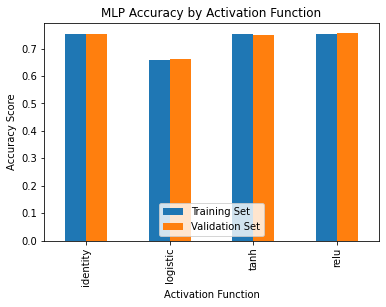

In [48]:
# let's try one more parameter - 
activation = ['identity', 'logistic', 'tanh', 'relu']

scores_train = []
scores_val = []

for i in range(4):
    mlp = MLPClassifier(activation=activation[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())
        
    print("Completed Round", i+1, "of 4.")
    
activation_cats = []
for i in range(4):
    activation_cats.append(str(activation[i]))
    
activations_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'activation': activation_cats}
)
activations_df['activation'] = activations_df['activation'].astype('category')

activations_df.plot.bar(x="activation")
plt.xlabel('Activation Function')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Activation Function')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Activation Function for the test set: relu.***

In [49]:
# according to this, our best parameters are a hidden layer size of (100,50,100) and an activtion function of relu, with some variation
start = time.time()

param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes':[(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]}

mlp_final = GridSearchCV(MLPClassifier(random_state=20170826), param_grid=param_grid)
mlp_final.fit(X_train, y_train)
predictions = mlp_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to use Grid Search:", (end-start)/60, "minutes")
print("Final MLP Test Accuracy:", final_score)
print("Best Params from Grid Search:", mlp_final.best_params_)

Time to use Grid Search: 0.6537906010945638 minutes
Final MLP Test Accuracy: 0.66
Best Params from Grid Search: {'activation': 'relu', 'hidden_layer_sizes': (100,)}


In [50]:
print("Final MLP accuracy is performing", ((final_score-0.7607182343065395)/0.7607182343065395)*100, "% better than the baseline of blind guessing.")

Final MLP accuracy is performing -13.2398869600323 % better than the baseline of blind guessing.


Completed round 1 of 5
Completed round 2 of 5
Completed round 3 of 5
Completed round 4 of 5
Completed round 5 of 5


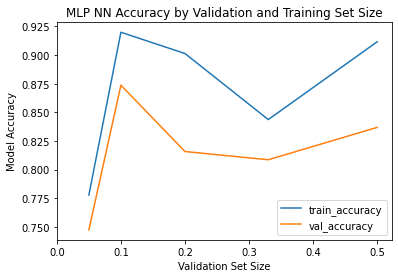

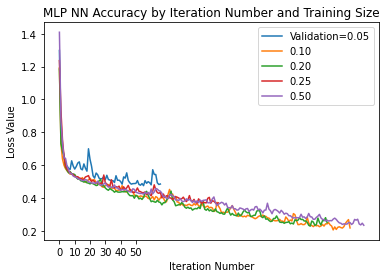

In [51]:
# RP

# split into train and test (we will use the test for all final testing)
X_train, X_test, y_train, y_test = train_test_split(rp_X, y, test_size=.05)

train_accuracy = []
val_accuracy = []

loss = []

for i in range(5):
    X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=validation_sizes[i], random_state=20170826)
    
    mlp = MLPClassifier(hidden_layer_sizes=(100,50,100) ,activation='relu', random_state=20170826)
    
    mlp.fit(X_train_new, y_train_new)
    
    loss.append(mlp.loss_curve_)
    
    predictions_train = mlp.predict(X_train_new)
    predictions_val = mlp.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_train_new, predictions_train))
    val_accuracy.append(accuracy_score(y_val, predictions_val))
    
    print("Completed round", i+1, "of 5")
    
training_df = pd.DataFrame(
    {'train_accuracy': train_accuracy,
     'val_accuracy': val_accuracy,
     'validation_sizes': validation_sizes}
)

plt.plot(training_df["validation_sizes"], training_df[["train_accuracy", "val_accuracy"]])
plt.xlabel('Validation Set Size')
plt.ylabel('Model Accuracy')
plt.title('MLP NN Accuracy by Validation and Training Set Size')
plt.xticks([0,.1,.2,.3,.4,.5])
plt.legend(['train_accuracy', "val_accuracy"])
plt.show()

for l in loss:
    plt.plot(l)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Value')
plt.title('MLP NN Accuracy by Iteration Number and Training Size')
plt.xticks(np.arange(0,51,10))
plt.legend(['Validation=0.05', "0.10", "0.20", "0.25", "0.50"])
plt.show()

***Best validation set size for the hyperparameters: 0.1 - This means a k of 10 for k-fold cross validation.***

Completed Round 1 of 5.
Completed Round 2 of 5.
Completed Round 3 of 5.
Completed Round 4 of 5.
Completed Round 5 of 5.


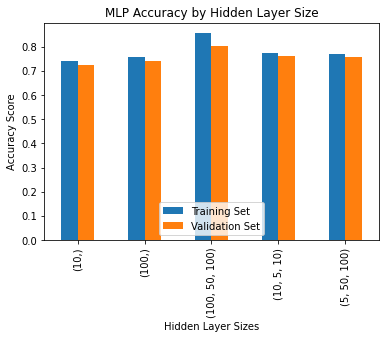

In [52]:
# first we do hidden_layer_sizes
hidden_layer_sizes = [(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]

scores_train = []
scores_val = []

for i in range(5):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())

    print("Completed Round", i+1, "of 5.")
    
hidden_layer_sizes_cats = []
for i in range(5):
    hidden_layer_sizes_cats.append(str(hidden_layer_sizes[i]))
    
hidden_layers_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'hidden_layer_sizes': hidden_layer_sizes_cats}
)
hidden_layers_df['hidden_layer_sizes'] = hidden_layers_df['hidden_layer_sizes'].astype('category')

hidden_layers_df.plot.bar(x="hidden_layer_sizes")
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Hidden Layer Size')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Hidden Layer size for the test set: (100,50,100).***

Completed Round 1 of 4.
Completed Round 2 of 4.
Completed Round 3 of 4.
Completed Round 4 of 4.


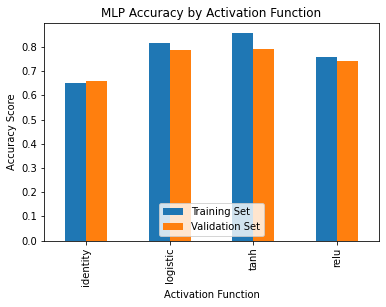

In [53]:
# let's try one more parameter - 
activation = ['identity', 'logistic', 'tanh', 'relu']

scores_train = []
scores_val = []

for i in range(4):
    mlp = MLPClassifier(activation=activation[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())
        
    print("Completed Round", i+1, "of 4.")
    
activation_cats = []
for i in range(4):
    activation_cats.append(str(activation[i]))
    
activations_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'activation': activation_cats}
)
activations_df['activation'] = activations_df['activation'].astype('category')

activations_df.plot.bar(x="activation")
plt.xlabel('Activation Function')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Activation Function')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Activation Function for the test set: tanh.***

In [54]:
# according to this, our best parameters are a hidden layer size of (100,50,100) and an activtion function of tanh, with some variation
start = time.time()

param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes':[(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]}

mlp_final = GridSearchCV(MLPClassifier(random_state=20170826), param_grid=param_grid)
mlp_final.fit(X_train, y_train)
predictions = mlp_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to use Grid Search:", (end-start)/60, "minutes")
print("Final MLP Test Accuracy:", final_score)
print("Best Params from Grid Search:", mlp_final.best_params_)

Time to use Grid Search: 1.2875091036160786 minutes
Final MLP Test Accuracy: 0.83
Best Params from Grid Search: {'activation': 'tanh', 'hidden_layer_sizes': (100, 50, 100)}


In [55]:
print("Final MLP accuracy is performing", ((final_score-0.7607182343065395)/0.7607182343065395)*100, "% better than the baseline of blind guessing.")

Final MLP accuracy is performing 9.107414883595734 % better than the baseline of blind guessing.


Completed round 1 of 5
Completed round 2 of 5
Completed round 3 of 5
Completed round 4 of 5
Completed round 5 of 5


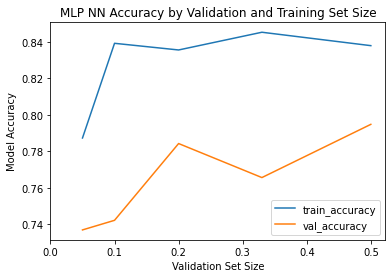

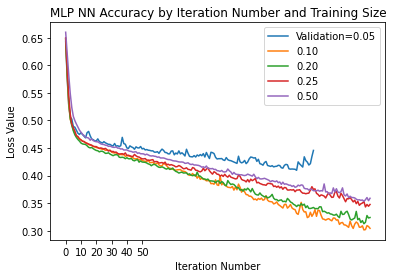

In [56]:
# FA

# split into train and test (we will use the test for all final testing)
X_train, X_test, y_train, y_test = train_test_split(fa_X, y, test_size=.05)

train_accuracy = []
val_accuracy = []

loss = []

for i in range(5):
    X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=validation_sizes[i], random_state=20170826)
    
    mlp = MLPClassifier(hidden_layer_sizes=(100,50,100) ,activation='relu', random_state=20170826)
    
    mlp.fit(X_train_new, y_train_new)
    
    loss.append(mlp.loss_curve_)
    
    predictions_train = mlp.predict(X_train_new)
    predictions_val = mlp.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_train_new, predictions_train))
    val_accuracy.append(accuracy_score(y_val, predictions_val))
    
    print("Completed round", i+1, "of 5")
    
training_df = pd.DataFrame(
    {'train_accuracy': train_accuracy,
     'val_accuracy': val_accuracy,
     'validation_sizes': validation_sizes}
)

plt.plot(training_df["validation_sizes"], training_df[["train_accuracy", "val_accuracy"]])
plt.xlabel('Validation Set Size')
plt.ylabel('Model Accuracy')
plt.title('MLP NN Accuracy by Validation and Training Set Size')
plt.xticks([0,.1,.2,.3,.4,.5])
plt.legend(['train_accuracy', "val_accuracy"])
plt.show()

for l in loss:
    plt.plot(l)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Value')
plt.title('MLP NN Accuracy by Iteration Number and Training Size')
plt.xticks(np.arange(0,51,10))
plt.legend(['Validation=0.05', "0.10", "0.20", "0.25", "0.50"])
plt.show()

***Best validation set size for the hyperparameters: 0.5 - This means a k of 2 for k-fold cross validation.***

Completed Round 1 of 5.
Completed Round 2 of 5.
Completed Round 3 of 5.
Completed Round 4 of 5.
Completed Round 5 of 5.


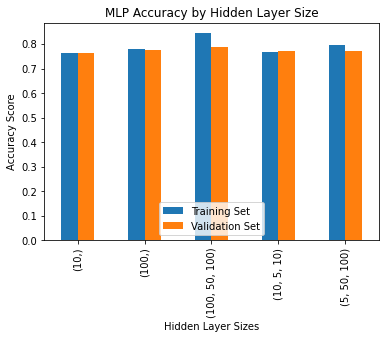

In [57]:
# first we do hidden_layer_sizes
hidden_layer_sizes = [(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]

scores_train = []
scores_val = []

for i in range(5):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())

    print("Completed Round", i+1, "of 5.")
    
hidden_layer_sizes_cats = []
for i in range(5):
    hidden_layer_sizes_cats.append(str(hidden_layer_sizes[i]))
    
hidden_layers_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'hidden_layer_sizes': hidden_layer_sizes_cats}
)
hidden_layers_df['hidden_layer_sizes'] = hidden_layers_df['hidden_layer_sizes'].astype('category')

hidden_layers_df.plot.bar(x="hidden_layer_sizes")
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Hidden Layer Size')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Hidden Layer size for the test set: (100,50,100).***

Completed Round 1 of 4.
Completed Round 2 of 4.
Completed Round 3 of 4.
Completed Round 4 of 4.


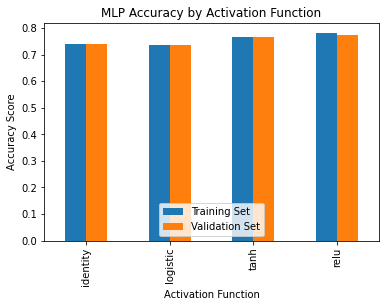

In [58]:
# let's try one more parameter - 
activation = ['identity', 'logistic', 'tanh', 'relu']

scores_train = []
scores_val = []

for i in range(4):
    mlp = MLPClassifier(activation=activation[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())
        
    print("Completed Round", i+1, "of 4.")
    
activation_cats = []
for i in range(4):
    activation_cats.append(str(activation[i]))
    
activations_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'activation': activation_cats}
)
activations_df['activation'] = activations_df['activation'].astype('category')

activations_df.plot.bar(x="activation")
plt.xlabel('Activation Function')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Activation Function')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Activation Function for the test set: relu.***

In [59]:
# according to this, our best parameters are a hidden layer size of (100,50,100) and an activtion function of relu, with some variation
start = time.time()

param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes':[(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]}

mlp_final = GridSearchCV(MLPClassifier(random_state=20170826), param_grid=param_grid)
mlp_final.fit(X_train, y_train)
predictions = mlp_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to use Grid Search:", (end-start)/60, "minutes")
print("Final MLP Test Accuracy:", final_score)
print("Best Params from Grid Search:", mlp_final.best_params_)

Time to use Grid Search: 1.2535345832506815 minutes
Final MLP Test Accuracy: 0.89
Best Params from Grid Search: {'activation': 'relu', 'hidden_layer_sizes': (100, 50, 100)}


In [60]:
print("Final MLP accuracy is performing", ((final_score-0.7607182343065395)/0.7607182343065395)*100, "% better than the baseline of blind guessing.")

Final MLP accuracy is performing 16.99469788722917 % better than the baseline of blind guessing.


*** Any conclusions so far from this? ***

1) "Best" NN from the new 4 tested: FA performed better than if we had just used the original dataset, increasing accuracy by 16% over baseline.

2) Similarities between them: It seems no matter which dim red we use, the layers and nodes do not matter as much.

3) Differences between them: Activation function seems to matter a little, and iterations to converge decrease dramatically.

## Revisiting Neural Networks Again (Using newly (newly) transformed datasets):

Let's take a look at the MLPs from P1 again...again (again!!!), AFTER we have ran any clustering algorithms on top of these dimensionality reduction algorithms for our dataset. Because this would result in 8 (4 x 2) "new" datasets, I will reduce this part of the experiment to just run on our "best" dimensionality reduction of FA and a comparison of PCA results from the last section, to have 4 new experiments.

In [61]:
# LEARNING CURVES
validation_sizes = [.05, .10, .20, .33, .5]

### KMeans into Neural Networks

Average time to run: 0.08076152006785074 seconds.


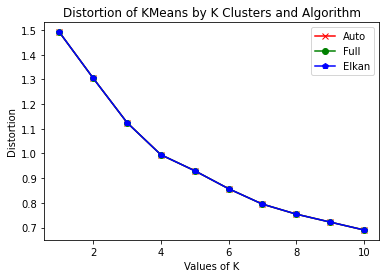

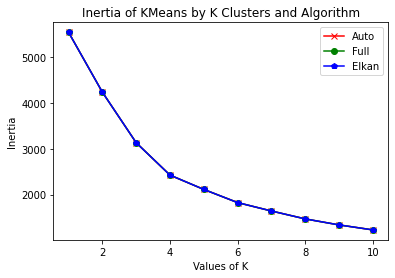

In [65]:
# FA
distortions = []
inertias = []
K = range(1, 11)
algorithm = ["auto", "full", "elkan"]
 
start = time.time()

for algo in algorithm:
    for k in K:
        kmeanModel = KMeans(n_clusters=k, algorithm=algo, random_state=20170826).fit(fa_X)

        distortions.append(sum(np.min(cdist(fa_X, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / fa_X.shape[0])
        inertias.append(kmeanModel.inertia_)

end = time.time()
print("Average time to run:", (end-start)/30, "seconds.")

distortions1 = distortions[:10]
distortions2 = distortions[10:20]
distortions3 = distortions[20:]

inertias1 = inertias[:10]
inertias2 = inertias[10:20]
inertias3 = inertias[20:]
    
plt.plot(K, distortions1, 'rx-')
plt.plot(K, distortions2, 'go-')
plt.plot(K, distortions3, 'bp-')
plt.legend(["Auto","Full","Elkan"])
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Distortion of KMeans by K Clusters and Algorithm')
plt.show()

plt.plot(K, inertias1, 'rx-')
plt.plot(K, inertias2, 'go-')
plt.plot(K, inertias3, 'bp-')
plt.legend(["Auto","Full","Elkan"])
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Inertia of KMeans by K Clusters and Algorithm')
plt.show()

In [66]:
# new dataset
kmeanModel_fa = KMeans(n_clusters=10, algorithm="auto", random_state=20170826).fit_transform(fa_X)
kmeanModel_fa_X = pd.DataFrame(kmeanModel_fa)
kmeanModel_fa_X.head()

,0,1,2,3,4,5,6,7,8,9
0,2.218154,1.432902,1.034462,2.112343,2.029261,4.215295,1.456900,0.810563,1.722274,2.067166
1,1.957732,1.909886,3.326786,2.753687,0.827881,3.302142,3.462093,1.970072,2.574830,1.124482
2,3.219689,0.824607,2.397643,1.784767,2.083587,4.364487,1.032568,1.765894,2.569273,2.046543
3,2.933903,2.176091,3.334541,1.486714,2.077699,2.024094,2.988643,2.497777,1.998555,0.841539
4,4.292640,4.316527,5.052322,3.243461,3.936275,0.878652,4.985452,4.417349,3.380512,2.850604


Completed round 1 of 5
Completed round 2 of 5
Completed round 3 of 5
Completed round 4 of 5
Completed round 5 of 5


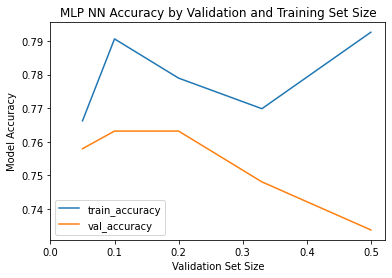

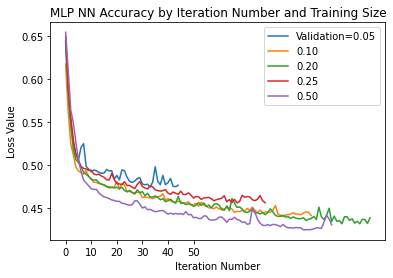

In [67]:
# FA & Kmeans

# split into train and test (we will use the test for all final testing)
X_train, X_test, y_train, y_test = train_test_split(kmeanModel_fa_X, y, test_size=.05)

train_accuracy = []
val_accuracy = []

loss = []

for i in range(5):
    X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=validation_sizes[i], random_state=20170826)
    
    mlp = MLPClassifier(hidden_layer_sizes=(100,50,100) ,activation='relu', random_state=20170826)
    
    mlp.fit(X_train_new, y_train_new)
    
    loss.append(mlp.loss_curve_)
    
    predictions_train = mlp.predict(X_train_new)
    predictions_val = mlp.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_train_new, predictions_train))
    val_accuracy.append(accuracy_score(y_val, predictions_val))
    
    print("Completed round", i+1, "of 5")
    
training_df = pd.DataFrame(
    {'train_accuracy': train_accuracy,
     'val_accuracy': val_accuracy,
     'validation_sizes': validation_sizes}
)

plt.plot(training_df["validation_sizes"], training_df[["train_accuracy", "val_accuracy"]])
plt.xlabel('Validation Set Size')
plt.ylabel('Model Accuracy')
plt.title('MLP NN Accuracy by Validation and Training Set Size')
plt.xticks([0,.1,.2,.3,.4,.5])
plt.legend(['train_accuracy', "val_accuracy"])
plt.show()

for l in loss:
    plt.plot(l)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Value')
plt.title('MLP NN Accuracy by Iteration Number and Training Size')
plt.xticks(np.arange(0,51,10))
plt.legend(['Validation=0.05', "0.10", "0.20", "0.25", "0.50"])
plt.show()

***Best validation set size for the hyperparameters: 0.1 - This means a k of 10 for k-fold cross validation.***

Completed Round 1 of 5.
Completed Round 2 of 5.
Completed Round 3 of 5.
Completed Round 4 of 5.
Completed Round 5 of 5.


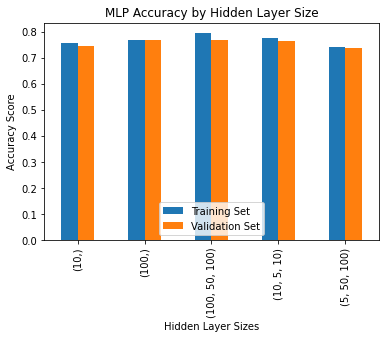

In [68]:
# first we do hidden_layer_sizes
hidden_layer_sizes = [(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]

scores_train = []
scores_val = []

for i in range(5):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())

    print("Completed Round", i+1, "of 5.")
    
hidden_layer_sizes_cats = []
for i in range(5):
    hidden_layer_sizes_cats.append(str(hidden_layer_sizes[i]))
    
hidden_layers_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'hidden_layer_sizes': hidden_layer_sizes_cats}
)
hidden_layers_df['hidden_layer_sizes'] = hidden_layers_df['hidden_layer_sizes'].astype('category')

hidden_layers_df.plot.bar(x="hidden_layer_sizes")
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Hidden Layer Size')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Hidden Layer size for the test set: (100,50,100). All of them performed similarly though.***

Completed Round 1 of 4.
Completed Round 2 of 4.
Completed Round 3 of 4.
Completed Round 4 of 4.


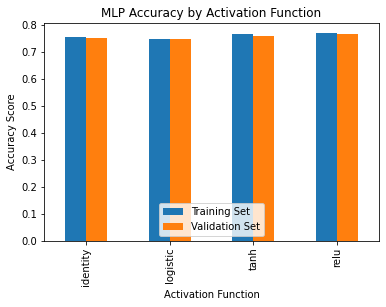

In [69]:
# let's try one more parameter - 
activation = ['identity', 'logistic', 'tanh', 'relu']

scores_train = []
scores_val = []

for i in range(4):
    mlp = MLPClassifier(activation=activation[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())
        
    print("Completed Round", i+1, "of 4.")
    
activation_cats = []
for i in range(4):
    activation_cats.append(str(activation[i]))
    
activations_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'activation': activation_cats}
)
activations_df['activation'] = activations_df['activation'].astype('category')

activations_df.plot.bar(x="activation")
plt.xlabel('Activation Function')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Activation Function')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Activation Function for the test set: tanh.***

In [70]:
# according to this, our best parameters are a hidden layer size of (100,50,100) and an activtion function of tanh, with some variation
start = time.time()

param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes':[(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]}

mlp_final = GridSearchCV(MLPClassifier(random_state=20170826), param_grid=param_grid)
mlp_final.fit(X_train, y_train)
predictions = mlp_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to use Grid Search:", (end-start)/60, "minutes")
print("Final MLP Test Accuracy:", final_score)
print("Best Params from Grid Search:", mlp_final.best_params_)

Time to use Grid Search: 1.2830759366353353 minutes
Final MLP Test Accuracy: 0.8
Best Params from Grid Search: {'activation': 'relu', 'hidden_layer_sizes': (100, 50, 100)}


In [71]:
print("Final MLP accuracy is performing", ((final_score-0.7607182343065395)/0.7607182343065395)*100, "% better than the baseline of blind guessing.")

Final MLP accuracy is performing 5.163773381779032 % better than the baseline of blind guessing.


Average time to run: 0.07140985329945883 seconds.


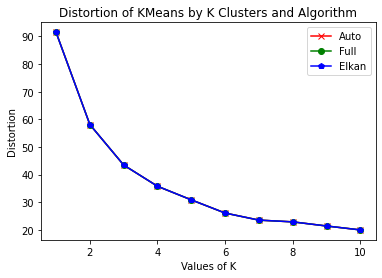

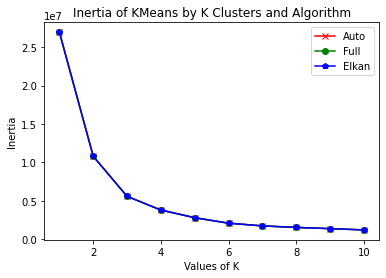

In [72]:
# PCA

distortions = []
inertias = []
K = range(1, 11)
algorithm = ["auto", "full", "elkan"]
 
start = time.time()

for algo in algorithm:
    for k in K:
        kmeanModel = KMeans(n_clusters=k, algorithm=algo, random_state=20170826).fit(pca_X)

        distortions.append(sum(np.min(cdist(pca_X, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / pca_X.shape[0])
        inertias.append(kmeanModel.inertia_)

end = time.time()
print("Average time to run:", (end-start)/30, "seconds.")

distortions1 = distortions[:10]
distortions2 = distortions[10:20]
distortions3 = distortions[20:]

inertias1 = inertias[:10]
inertias2 = inertias[10:20]
inertias3 = inertias[20:]
    
plt.plot(K, distortions1, 'rx-')
plt.plot(K, distortions2, 'go-')
plt.plot(K, distortions3, 'bp-')
plt.legend(["Auto","Full","Elkan"])
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Distortion of KMeans by K Clusters and Algorithm')
plt.show()

plt.plot(K, inertias1, 'rx-')
plt.plot(K, inertias2, 'go-')
plt.plot(K, inertias3, 'bp-')
plt.legend(["Auto","Full","Elkan"])
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Inertia of KMeans by K Clusters and Algorithm')
plt.show()

In [73]:
# new dataset
kmeanModel_pca = KMeans(n_clusters=4, algorithm="auto", random_state=20170826).fit_transform(pca_X)
kmeanModel_pca_X = pd.DataFrame(kmeanModel_pca)
kmeanModel_pca_X.head()

,0,1,2,3
0,106.030653,484.281464,222.582919,21.334709
1,37.236145,366.605454,112.327789,126.108456
2,107.993059,486.528554,224.800894,20.812183
3,147.864507,234.856730,28.744033,248.102746
4,376.695008,23.353301,257.189154,477.276619


Completed round 1 of 5
Completed round 2 of 5
Completed round 3 of 5
Completed round 4 of 5
Completed round 5 of 5


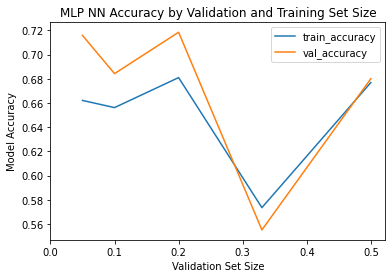

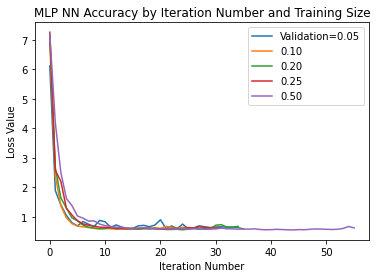

In [74]:
# PCA & Kmeans

# split into train and test (we will use the test for all final testing)
X_train, X_test, y_train, y_test = train_test_split(kmeanModel_pca_X, y, test_size=.05)

train_accuracy = []
val_accuracy = []

loss = []

for i in range(5):
    X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=validation_sizes[i], random_state=20170826)
    
    mlp = MLPClassifier(hidden_layer_sizes=(100,50,100) ,activation='relu', random_state=20170826)
    
    mlp.fit(X_train_new, y_train_new)
    
    loss.append(mlp.loss_curve_)
    
    predictions_train = mlp.predict(X_train_new)
    predictions_val = mlp.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_train_new, predictions_train))
    val_accuracy.append(accuracy_score(y_val, predictions_val))
    
    print("Completed round", i+1, "of 5")
    
training_df = pd.DataFrame(
    {'train_accuracy': train_accuracy,
     'val_accuracy': val_accuracy,
     'validation_sizes': validation_sizes}
)

plt.plot(training_df["validation_sizes"], training_df[["train_accuracy", "val_accuracy"]])
plt.xlabel('Validation Set Size')
plt.ylabel('Model Accuracy')
plt.title('MLP NN Accuracy by Validation and Training Set Size')
plt.xticks([0,.1,.2,.3,.4,.5])
plt.legend(['train_accuracy', "val_accuracy"])
plt.show()

for l in loss:
    plt.plot(l)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Value')
plt.title('MLP NN Accuracy by Iteration Number and Training Size')
plt.xticks(np.arange(0,51,10))
plt.legend(['Validation=0.05', "0.10", "0.20", "0.25", "0.50"])
plt.show()

***Best validation set size for the hyperparameters: 0.5 - This means a k of 2 for k-fold cross validation.***

Completed Round 1 of 5.
Completed Round 2 of 5.
Completed Round 3 of 5.
Completed Round 4 of 5.
Completed Round 5 of 5.


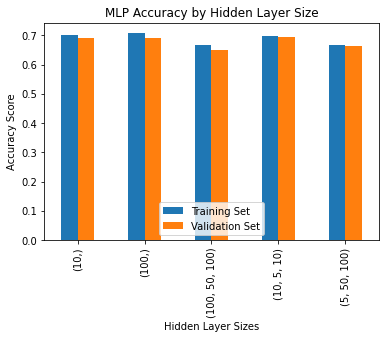

In [75]:
# first we do hidden_layer_sizes
hidden_layer_sizes = [(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]

scores_train = []
scores_val = []

for i in range(5):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())

    print("Completed Round", i+1, "of 5.")
    
hidden_layer_sizes_cats = []
for i in range(5):
    hidden_layer_sizes_cats.append(str(hidden_layer_sizes[i]))
    
hidden_layers_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'hidden_layer_sizes': hidden_layer_sizes_cats}
)
hidden_layers_df['hidden_layer_sizes'] = hidden_layers_df['hidden_layer_sizes'].astype('category')

hidden_layers_df.plot.bar(x="hidden_layer_sizes")
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Hidden Layer Size')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Hidden Layer size for the test set: (100,). All of them performed similarly though.***

Completed Round 1 of 4.
Completed Round 2 of 4.
Completed Round 3 of 4.
Completed Round 4 of 4.


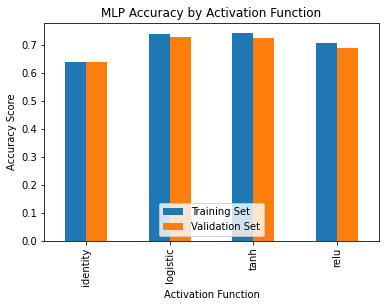

In [76]:
# let's try one more parameter - 
activation = ['identity', 'logistic', 'tanh', 'relu']

scores_train = []
scores_val = []

for i in range(4):
    mlp = MLPClassifier(activation=activation[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())
        
    print("Completed Round", i+1, "of 4.")
    
activation_cats = []
for i in range(4):
    activation_cats.append(str(activation[i]))
    
activations_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'activation': activation_cats}
)
activations_df['activation'] = activations_df['activation'].astype('category')

activations_df.plot.bar(x="activation")
plt.xlabel('Activation Function')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Activation Function')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Activation Function for the test set: tanh.***

In [77]:
# according to this, our best parameters are a hidden layer size of (100,) and an activtion function of tanh, with some variation
start = time.time()

param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes':[(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]}

mlp_final = GridSearchCV(MLPClassifier(random_state=20170826), param_grid=param_grid)
mlp_final.fit(X_train, y_train)
predictions = mlp_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to use Grid Search:", (end-start)/60, "minutes")
print("Final MLP Test Accuracy:", final_score)
print("Best Params from Grid Search:", mlp_final.best_params_)

Time to use Grid Search: 0.6929725766181946 minutes
Final MLP Test Accuracy: 0.73
Best Params from Grid Search: {'activation': 'logistic', 'hidden_layer_sizes': (100, 50, 100)}


In [78]:
print("Final MLP accuracy is performing", ((final_score-0.7607182343065395)/0.7607182343065395)*100, "% better than the baseline of blind guessing.")

Final MLP accuracy is performing -4.038056789126641 % better than the baseline of blind guessing.


### GMM into Neural Networks

Average time to run: 0.027737824122111003 seconds.


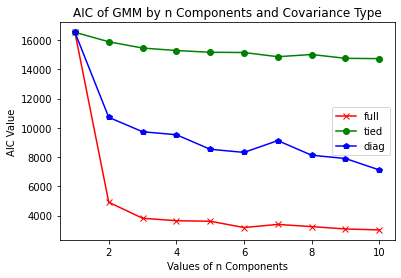

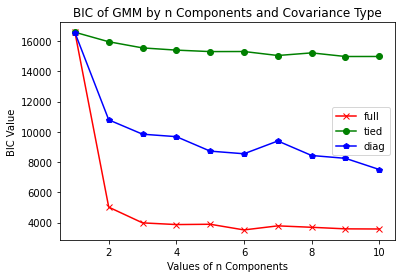

In [79]:
# FA

AICs = []
BICs = []
K = range(1, 11)
covariance_type = ["full", "tied", "diag"]
 
start = time.time()

for cov in covariance_type:
    for k in K:
        # Building and fitting the model
        gmm = GaussianMixture(n_components=k, covariance_type=cov, random_state=20170826).fit(fa_X)

        AICs.append(gmm.aic(fa_X))
        BICs.append(gmm.bic(fa_X))

end = time.time()
print("Average time to run:", (end-start)/30, "seconds.")

AICs1 = AICs[:10]
AICs2 = AICs[10:20]
AICs3 = AICs[20:]

BICs1 = BICs[:10]
BICs2 = BICs[10:20]
BICs3 = BICs[20:]
    
plt.plot(K, AICs1, 'rx-')
plt.plot(K, AICs2, 'go-')
plt.plot(K, AICs3, 'bp-')
plt.legend(["full", "tied", "diag"])
plt.xlabel('Values of n Components')
plt.ylabel('AIC Value')
plt.title('AIC of GMM by n Components and Covariance Type')
plt.show()

plt.plot(K, BICs1, 'rx-')
plt.plot(K, BICs2, 'go-')
plt.plot(K, BICs3, 'bp-')
plt.legend(["full", "tied", "diag"])
plt.xlabel('Values of n Components')
plt.ylabel('BIC Value')
plt.title('BIC of GMM by n Components and Covariance Type')
plt.show()

In [80]:
# new dataset
gmm_fa = GaussianMixture(n_components=4, covariance_type="full", random_state=20170826).fit_predict(fa_X)
gmm_fa_X = pd.DataFrame(gmm_fa)
gmm_fa_X.head()

,0
0,3
1,0
2,3
3,2
4,1


Completed round 1 of 5
Completed round 2 of 5
Completed round 3 of 5
Completed round 4 of 5
Completed round 5 of 5


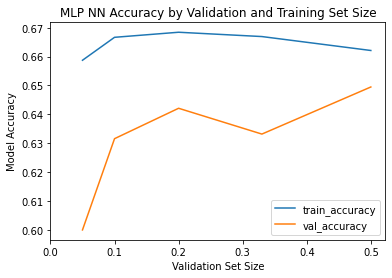

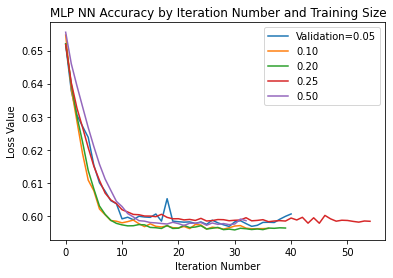

In [82]:
# FA & GMM

# split into train and test (we will use the test for all final testing)
X_train, X_test, y_train, y_test = train_test_split(gmm_fa_X, y, test_size=.05)

train_accuracy = []
val_accuracy = []

loss = []

for i in range(5):
    X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=validation_sizes[i], random_state=20170826)
    
    mlp = MLPClassifier(hidden_layer_sizes=(100,50,100) ,activation='relu', random_state=20170826)
    
    mlp.fit(X_train_new, y_train_new)
    
    loss.append(mlp.loss_curve_)
    
    predictions_train = mlp.predict(X_train_new)
    predictions_val = mlp.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_train_new, predictions_train))
    val_accuracy.append(accuracy_score(y_val, predictions_val))
    
    print("Completed round", i+1, "of 5")
    
training_df = pd.DataFrame(
    {'train_accuracy': train_accuracy,
     'val_accuracy': val_accuracy,
     'validation_sizes': validation_sizes}
)

plt.plot(training_df["validation_sizes"], training_df[["train_accuracy", "val_accuracy"]])
plt.xlabel('Validation Set Size')
plt.ylabel('Model Accuracy')
plt.title('MLP NN Accuracy by Validation and Training Set Size')
plt.xticks([0,.1,.2,.3,.4,.5])
plt.legend(['train_accuracy', "val_accuracy"])
plt.show()

for l in loss:
    plt.plot(l)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Value')
plt.title('MLP NN Accuracy by Iteration Number and Training Size')
plt.xticks(np.arange(0,51,10))
plt.legend(['Validation=0.05', "0.10", "0.20", "0.25", "0.50"])
plt.show()

***Best validation set size for the hyperparameters: 0.5 - This means a k of 2 for k-fold cross validation.***

Completed Round 1 of 5.
Completed Round 2 of 5.
Completed Round 3 of 5.
Completed Round 4 of 5.
Completed Round 5 of 5.


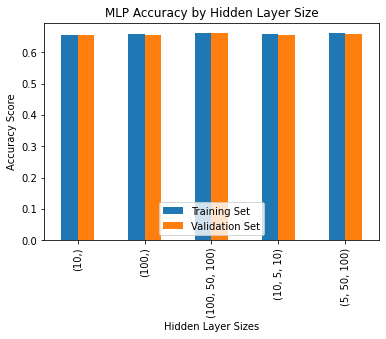

In [83]:
# first we do hidden_layer_sizes
hidden_layer_sizes = [(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]

scores_train = []
scores_val = []

for i in range(5):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())

    print("Completed Round", i+1, "of 5.")
    
hidden_layer_sizes_cats = []
for i in range(5):
    hidden_layer_sizes_cats.append(str(hidden_layer_sizes[i]))
    
hidden_layers_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'hidden_layer_sizes': hidden_layer_sizes_cats}
)
hidden_layers_df['hidden_layer_sizes'] = hidden_layers_df['hidden_layer_sizes'].astype('category')

hidden_layers_df.plot.bar(x="hidden_layer_sizes")
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Hidden Layer Size')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Hidden Layer size for the test set: (100,50,100). All of them performed similarly though.***

Completed Round 1 of 4.
Completed Round 2 of 4.
Completed Round 3 of 4.
Completed Round 4 of 4.


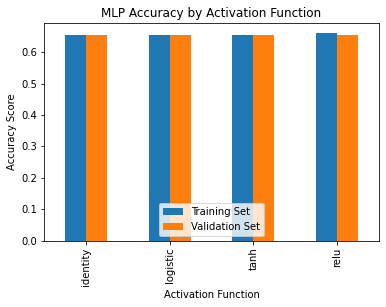

In [84]:
# let's try one more parameter - 
activation = ['identity', 'logistic', 'tanh', 'relu']

scores_train = []
scores_val = []

for i in range(4):
    mlp = MLPClassifier(activation=activation[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())
        
    print("Completed Round", i+1, "of 4.")
    
activation_cats = []
for i in range(4):
    activation_cats.append(str(activation[i]))
    
activations_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'activation': activation_cats}
)
activations_df['activation'] = activations_df['activation'].astype('category')

activations_df.plot.bar(x="activation")
plt.xlabel('Activation Function')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Activation Function')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Activation Function for the test set: relu.***

In [85]:
# according to this, our best parameters are a hidden layer size of (100,50,100) and an activtion function of relu, with some variation
start = time.time()

param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes':[(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]}

mlp_final = GridSearchCV(MLPClassifier(random_state=20170826), param_grid=param_grid)
mlp_final.fit(X_train, y_train)
predictions = mlp_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to use Grid Search:", (end-start)/60, "minutes")
print("Final MLP Test Accuracy:", final_score)
print("Best Params from Grid Search:", mlp_final.best_params_)

Time to use Grid Search: 0.6338570713996887 minutes
Final MLP Test Accuracy: 0.67
Best Params from Grid Search: {'activation': 'tanh', 'hidden_layer_sizes': (100, 50, 100)}


In [86]:
print("Final MLP accuracy is performing", ((final_score-0.7607182343065395)/0.7607182343065395)*100, "% better than the baseline of blind guessing.")

Final MLP accuracy is performing -11.925339792760061 % better than the baseline of blind guessing.


Average time to run: 0.02643160820007324 seconds.


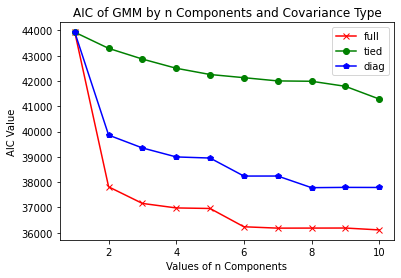

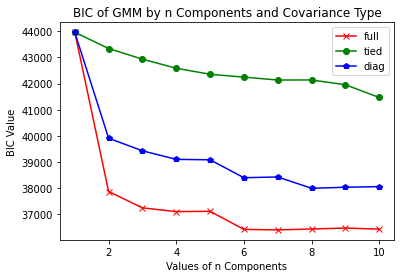

In [87]:
# PCA

AICs = []
BICs = []
K = range(1, 11)
covariance_type = ["full", "tied", "diag"]
 
start = time.time()

for cov in covariance_type:
    for k in K:
        # Building and fitting the model
        gmm = GaussianMixture(n_components=k, covariance_type=cov, random_state=20170826).fit(pca_X)

        AICs.append(gmm.aic(pca_X))
        BICs.append(gmm.bic(pca_X))

end = time.time()
print("Average time to run:", (end-start)/30, "seconds.")

AICs1 = AICs[:10]
AICs2 = AICs[10:20]
AICs3 = AICs[20:]

BICs1 = BICs[:10]
BICs2 = BICs[10:20]
BICs3 = BICs[20:]
    
plt.plot(K, AICs1, 'rx-')
plt.plot(K, AICs2, 'go-')
plt.plot(K, AICs3, 'bp-')
plt.legend(["full", "tied", "diag"])
plt.xlabel('Values of n Components')
plt.ylabel('AIC Value')
plt.title('AIC of GMM by n Components and Covariance Type')
plt.show()

plt.plot(K, BICs1, 'rx-')
plt.plot(K, BICs2, 'go-')
plt.plot(K, BICs3, 'bp-')
plt.legend(["full", "tied", "diag"])
plt.xlabel('Values of n Components')
plt.ylabel('BIC Value')
plt.title('BIC of GMM by n Components and Covariance Type')
plt.show()

In [88]:
# new dataset
gmm_pca = GaussianMixture(n_components=10, covariance_type="full", random_state=20170826).fit_predict(pca_X)
gmm_pca_X = pd.DataFrame(gmm_pca)
gmm_pca_X.head()

,0
0,0
1,2
2,6
3,8
4,3


Completed round 1 of 5
Completed round 2 of 5
Completed round 3 of 5
Completed round 4 of 5
Completed round 5 of 5


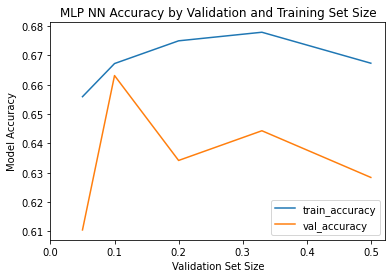

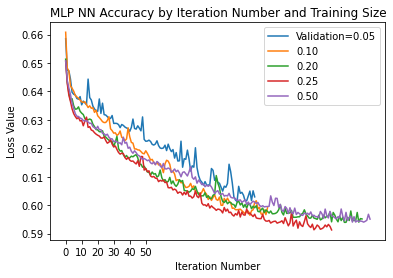

In [89]:
# PCA & GMM

# split into train and test (we will use the test for all final testing)
X_train, X_test, y_train, y_test = train_test_split(gmm_pca_X, y, test_size=.05)

train_accuracy = []
val_accuracy = []

loss = []

for i in range(5):
    X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=validation_sizes[i], random_state=20170826)
    
    mlp = MLPClassifier(hidden_layer_sizes=(100,50,100) ,activation='relu', random_state=20170826)
    
    mlp.fit(X_train_new, y_train_new)
    
    loss.append(mlp.loss_curve_)
    
    predictions_train = mlp.predict(X_train_new)
    predictions_val = mlp.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_train_new, predictions_train))
    val_accuracy.append(accuracy_score(y_val, predictions_val))
    
    print("Completed round", i+1, "of 5")
    
training_df = pd.DataFrame(
    {'train_accuracy': train_accuracy,
     'val_accuracy': val_accuracy,
     'validation_sizes': validation_sizes}
)

plt.plot(training_df["validation_sizes"], training_df[["train_accuracy", "val_accuracy"]])
plt.xlabel('Validation Set Size')
plt.ylabel('Model Accuracy')
plt.title('MLP NN Accuracy by Validation and Training Set Size')
plt.xticks([0,.1,.2,.3,.4,.5])
plt.legend(['train_accuracy', "val_accuracy"])
plt.show()

for l in loss:
    plt.plot(l)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Value')
plt.title('MLP NN Accuracy by Iteration Number and Training Size')
plt.xticks(np.arange(0,51,10))
plt.legend(['Validation=0.05', "0.10", "0.20", "0.25", "0.50"])
plt.show()

***Best validation set size for the hyperparameters: 0.1 - This means a k of 10 for k-fold cross validation.***

Completed Round 1 of 5.
Completed Round 2 of 5.
Completed Round 3 of 5.
Completed Round 4 of 5.
Completed Round 5 of 5.


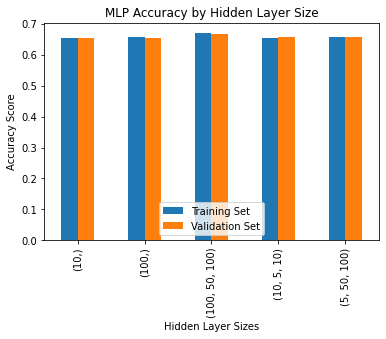

In [90]:
# first we do hidden_layer_sizes
hidden_layer_sizes = [(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]

scores_train = []
scores_val = []

for i in range(5):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())

    print("Completed Round", i+1, "of 5.")
    
hidden_layer_sizes_cats = []
for i in range(5):
    hidden_layer_sizes_cats.append(str(hidden_layer_sizes[i]))
    
hidden_layers_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'hidden_layer_sizes': hidden_layer_sizes_cats}
)
hidden_layers_df['hidden_layer_sizes'] = hidden_layers_df['hidden_layer_sizes'].astype('category')

hidden_layers_df.plot.bar(x="hidden_layer_sizes")
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Hidden Layer Size')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Hidden Layer size for the test set: (100,50,100). All of them performed similarly though.***

Completed Round 1 of 4.
Completed Round 2 of 4.
Completed Round 3 of 4.
Completed Round 4 of 4.


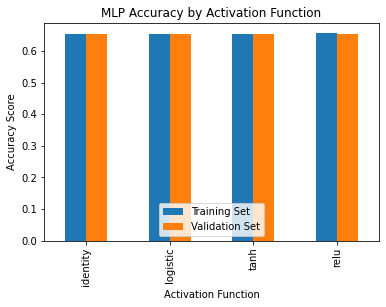

In [91]:
# let's try one more parameter - 
activation = ['identity', 'logistic', 'tanh', 'relu']

scores_train = []
scores_val = []

for i in range(4):
    mlp = MLPClassifier(activation=activation[i], random_state=20170826)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())
        
    print("Completed Round", i+1, "of 4.")
    
activation_cats = []
for i in range(4):
    activation_cats.append(str(activation[i]))
    
activations_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'activation': activation_cats}
)
activations_df['activation'] = activations_df['activation'].astype('category')

activations_df.plot.bar(x="activation")
plt.xlabel('Activation Function')
plt.ylabel('Accuracy Score')
plt.title('MLP Accuracy by Activation Function')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

***Chosen Activation Function for the test set: relu.***

In [92]:
# according to this, our best parameters are a hidden layer size of (100,50,100) and an activtion function of relu, with some variation
start = time.time()

param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes':[(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]}

mlp_final = GridSearchCV(MLPClassifier(random_state=20170826), param_grid=param_grid)
mlp_final.fit(X_train, y_train)
predictions = mlp_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to use Grid Search:", (end-start)/60, "minutes")
print("Final MLP Test Accuracy:", final_score)
print("Best Params from Grid Search:", mlp_final.best_params_)

Time to use Grid Search: 0.6496724724769593 minutes
Final MLP Test Accuracy: 0.74
Best Params from Grid Search: {'activation': 'relu', 'hidden_layer_sizes': (100, 50, 100)}


In [93]:
print("Final MLP accuracy is performing", ((final_score-0.7607182343065395)/0.7607182343065395)*100, "% better than the baseline of blind guessing.")

Final MLP accuracy is performing -2.723509621854402 % better than the baseline of blind guessing.


*** Any conclusions from this? ***

1) Using clustering as features did not improve performance at all - in fact it made things worse. This is probably due to the categorical nature of the data - there is so much going on that even if we try to cluster we cannot get an accurate read of what is going on.

2) Similarities between them: All of them performed terribly.

3) Differences between them: Even so, different activation functions and function sizes still affected accuracy a bit - this would be curious to explore more.

***Models on this dataset FINISHED - see accompanying .ipynb notebook for other dataset.***